In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import surp

Pignatari et al. (2016) reports yields in terms of over production factors (OP), defined as
$$
{\rm OP} = \frac{M_{\rm ej, i}}{M_{\rm ej} Z_{i}^0}
$$
 i.e. the ratio between the mean ejected abundance composition and the initial composition of the star. 
 Since we are interested in net fractional yields, we can calculate these from the overproduction factor as follows
 $$
 Y_{X} = Z_{\rm ini} ({\rm OP} - 1) \frac{M_{\rm ej}}{M_{\rm ini}} = (Z_{\rm ej} - Z_{\rm ini}) \frac{M_{\rm ej}}{M_{\rm ini}}
 $$.
 
Thus from each nu-grid model, we need the OP factor, the initial and ejected mass, and the birth composition.

- P16: 10.26093/cds/vizier.22250024. Table 12. 
- R18 is available at DOI: 10.11570/18.0002

For P16, note that set 1.1 has Z=0.01, set 1.2 has Z=0.02.

In [71]:
path = surp.DATA_DIR + "/nugrid/"

In [166]:
p16_stars = pd.read_csv(path + "p16_stars.tsv", sep="\s+", comment="#")
p16_stars.set_index(["mass", "Z"], inplace=True)


In [142]:
p16_ops = pd.read_csv(path + "p16_yields.tsv", sep="\t", comment="#")

Need Grevesse and Noels 2003 solar composition.

In [144]:
p16_ops.Set.unique()

array([1.2, 1.1])

In [145]:
p16_ops["Z"] = np.where(p16_ops.Set == 1.2, 0.02, 0.01)

In [149]:
p16_ops = p16_ops.melt(id_vars=["Sp", "Z"], value_vars=["OP1.65", "OP2", "OP3", "OP4", "OP5",], var_name="Mname", value_name="OP")


In [150]:
p16_ops["mass"] = p16_ops.Mname.str.extract(r"(\d?\.?\d+)")
p16_ops["mass"] = pd.to_numeric(p16_ops.mass)

In [151]:
p16 = p16_ops[p16_ops.mass < 8]

In [177]:
gn93 = {ele: raw[ele].x0.iloc[0] for ele in elements} # TODO go to primary source for this
# this is for Z=0.02
gn93["Tc"] = 0
gn93["Pm"] = 0

In [178]:
m_rem = [p16_stars.loc[r.mass, r.Z][0] for i, r in p16.iterrows()]

In [179]:
p16["M_rem"] = m_rem

In [180]:
Z0 = [gn93[r.Sp.strip()] * r.Z/0.02 for i, r in p16.iterrows()]

In [183]:
p16["Zini"] = Z0

In [184]:
p16["yields"] = p16.Zini * (p16.OP - 1) * (1 - p16.M_rem/p16.mass)

In [186]:
p16

,Sp,Z,Mname,OP,mass,M_rem,Zsun,Zini,yields
0,H,0.02,OP1.65,0.97,1.65,0.651,7.065000e-01,7.065000e-01,-1.283261e-02
1,He,0.02,OP1.65,1.07,1.65,0.651,2.735000e-01,2.735000e-01,1.159143e-02
2,C,0.02,OP1.65,1.37,1.65,0.651,3.466000e-03,3.466000e-03,7.764470e-04
3,N,0.02,OP1.65,2.19,1.65,0.651,1.063000e-03,1.063000e-03,7.658818e-04
4,O,0.02,OP1.65,1.04,1.65,0.651,9.650000e-03,9.650000e-03,2.337055e-04
...,...,...,...,...,...,...,...,...,...
795,Au,0.01,OP5,1.01,5.00,0.910,5.415000e-10,5.415000e-10,4.429470e-12
796,Hg,0.01,OP5,1.17,5.00,0.910,1.004000e-09,1.004000e-09,1.396162e-10
797,Tl,0.01,OP5,1.17,5.00,0.910,5.490000e-10,5.490000e-10,7.634394e-11
798,Pb,0.01,OP5,1.38,5.00,0.910,7.515000e-09,7.515000e-09,2.335963e-09


In [190]:
yields["Au"]

,mass,Z,y
0,1.00,0.0200,8.830000e-14
1,1.65,0.0200,5.030303e-14
2,2.00,0.0200,-1.562711e-10
3,3.00,0.0200,1.659893e-10
4,4.00,0.0200,4.347350e-11
5,5.00,0.0200,6.914880e-12
6,6.00,0.0200,-3.596683e-12
7,7.00,0.0200,-9.788857e-12
8,12.00,0.0200,-5.519750e-11
9,15.00,0.0200,-9.275800e-11


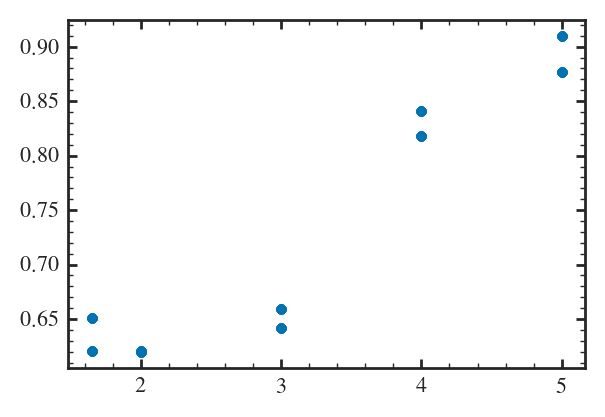

In [157]:
plt.scatter(p16.mass, p16.M_rem)

In [ ]:
p16["yields"] = 

In [5]:
b19 = pd.read_csv(surp.DATA_DIR + "/nugrid_B19.txt", sep="\s+", skiprows=2, index_col=0)
b21 = pd.read_csv(surp.DATA_DIR + "/nugrid_B21.txt", sep="\s+", skiprows=2, index_col=0)

In [6]:
b19_ele = pd.DataFrame(columns=b19.columns)
for idx, row in b19.iterrows():
    ele, _ = idx.split("-")
    if ele in b19_ele.index:
        b19_ele.loc[ele] += row
    else:
        b19_ele = pd.concat([b19_ele, pd.DataFrame(row.to_dict(), index=[ele])])

In [7]:
b21_ele = pd.DataFrame(columns=b21.columns)
for idx, row in b21.iterrows():
    ele, _ = idx.split("-")
    if ele in b21_ele.index:
        b21_ele.loc[ele] += row
    else:
        b21_ele = pd.concat([b21_ele, pd.DataFrame(row.to_dict(), index=[ele])])

In [8]:
elements = "H, He, Li, B, C, N, O, F, Ne, Na, Mg, Al, Si, P, Pb, S, Cl, Ar, K, Ca, Sc, Ti, V, Cr, Mn, Fe, Co, Ni, Cu, Zn, Ga, Ge, As, Se, Br, Kr, Rb, Sr, Y, Zr, Nb, Mo, Ru, Rh, Pd, Ag, Cd, In, Sn, Sb, Te, I, Xe, Cs, Ba, La, Ce, Pr, Nd, Sm, Eu, Gd, Tb, Dy, Ho, Er, Tm, Yb, Lu, Hf, Ta, W, Re, Os, Ir, Pt, Au, Hg, Tl, Bi".split(", ")

In [9]:
raw = {}
yields = {}

for ele in elements:
    raw[ele] = pd.DataFrame()
    yields[ele] = pd.DataFrame()

with open(surp.DATA_DIR + "/element_yield_table_MESAonly_fryer12_delay_total.txt") as file:
    skip = 6
    M = None
    M_ej = None
    for line in file:
        if skip > 0:
            skip -= 1
            continue
            
        if line[:7] == "H Table":
            s1, s2 = line[10:].split(",")
            M = float(s1[2:])
            Z = float(s2[2:-2])
            skip = 1
            continue
            
        if line[:8] == "H Mfinal":
            M_rem = float(line[10:])
            M_ej = M - M_rem
            skip = 1
            continue
            
        if M_ej is None:
            continue
        
        _, ele, y, x0, _ = line.split("&")

        y = float(y)
        x0 = float(x0)
        xf = y/M_ej
        y_net_fractional = (xf - x0) * M_ej/M
        ele = ele.strip()
        
        row = pd.DataFrame({"mass":M, "M_rem":M_rem, "Z":Z, "y":y, "x0": x0}, index=[0])
        raw[ele] = pd.concat([raw[ele], row], ignore_index=True)
        
        row = pd.DataFrame({"mass":M, "Z":Z, "y":y_net_fractional}, index=[0])
        yields[ele] = pd.concat([yields[ele], row], ignore_index=True)

In [171]:
raw["Bi"].iloc[0]

M_rem    5.601000e-01
y        3.835000e-10
x0       8.718000e-10
M        1.000000e+00
Z        2.000000e-02
Name: (1.0, 0.02), dtype: float64

In [10]:
for ele in elements:
    raw[ele].set_index(["mass", "Z"], inplace=True)

In [11]:
# update the relevant models with B19 and B21
for ele in elements:
    b19r = b19_ele.loc[ele]
    b21r = b21_ele.loc[ele]
    for M, Z, b, key in [
        (2, 0.01, b19r, "m2z1m2"),
        (3, 0.01, b19r, "m3z1m2"),
        (2, 0.02, b19r, "m2z2m2"),
        (3, 0.02, b19r, "m3z2m2"),
        (2, 0.001, b21r, "m2z1m3-bigpoc"),
        (3, 0.001, b21r, "m3z1m3-bigpoc")
    ]:
        df = raw[ele]
        y = b[key]
        raw[ele].loc[(M, Z), :]["y"] = y

In [12]:
yields_old = {ele: df.copy() for ele, df in yields.items()}

In [13]:
for ele in elements:
    df = raw[ele]
    df["M"] = [a[0] for a in df.index]
    df["Z"] = [a[1] for a in df.index]
    M_ej = df.M - df.M_rem
    x_ej = df.y/M_ej
    y_net_frac = (x_ej - df.x0) * M_ej/df.M
    yields[ele]["y"] = y_net_frac.values

In [16]:
yields

{'H':      mass       Z         y
 0    1.00  0.0200 -0.008889
 1    1.65  0.0200 -0.012663
 2    2.00  0.0200 -0.132914
 3    3.00  0.0200 -0.049178
 4    4.00  0.0200 -0.033271
 5    5.00  0.0200 -0.058208
 6    6.00  0.0200 -0.075003
 7    7.00  0.0200 -0.089196
 8   12.00  0.0200 -0.137711
 9   15.00  0.0200 -0.195602
 10  20.00  0.0200 -0.204813
 11  25.00  0.0200 -0.165815
 12   1.00  0.0100 -0.008870
 13   1.65  0.0100 -0.014339
 14   2.00  0.0100 -0.139281
 15   3.00  0.0100 -0.262425
 16   4.00  0.0100 -0.040887
 17   5.00  0.0100 -0.066907
 18   6.00  0.0100 -0.086087
 19   7.00  0.0100 -0.096842
 20  12.00  0.0100 -0.156776
 21  15.00  0.0100 -0.211421
 22  20.00  0.0100 -0.225333
 23  25.00  0.0100 -0.176462
 24   1.00  0.0060 -0.008707
 25   1.65  0.0060 -0.018528
 26   2.00  0.0060 -0.029125
 27   3.00  0.0060 -0.025823
 28   4.00  0.0060 -0.043456
 29   5.00  0.0060 -0.067374
 30   6.00  0.0060 -0.084897
 31   7.00  0.0060 -0.096793
 32  12.00  0.0060 -0.169290
 33  15.0

In [14]:
cd ../../VICE/vice/yields/agb/pignatari16/

[Errno 2] No such file or directory: '../../VICE/vice/yields/agb/pignatari16/'
/users/PAS2232/aeyobd/surp/carbon_paper/data_analysis


In [12]:
for ele, table in yields.items():
    filename = "%s.dat" % (ele.lower())
    df = table[table.mass < 8].sort_values(by=["mass", "Z"])
    df.to_csv(filename, sep="\t", index=False, header=False)